In [29]:
import seaborn as sns


In [30]:
titanic = sns.load_dataset('titanic')
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [31]:
import pandas as pd


In [32]:
titanic.to_csv('titanic.csv', index=False)


In [33]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
titanic['age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [35]:
# age의 null 값을 age의 중간값으로 대체
titanic['age'] = titanic['age'].fillna(titanic['age'].median())


In [36]:
titanic['age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [37]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
titanic['embarked']


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [39]:
titanic['embarked'].value_counts()


S    644
C    168
Q     77
Name: embarked, dtype: int64

In [40]:
titanic['embarked'] = titanic['embarked'].fillna('S')


In [41]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [42]:
titanic['embark_town']


0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [43]:
titanic['embark_town'].value_counts()


Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [44]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')


In [45]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [46]:
titanic['deck']


0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [47]:
titanic['deck'].value_counts()


C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [48]:
titanic['deck'] = titanic['deck'].fillna('C')


In [49]:
titanic['deck']


0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [50]:
titanic.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [51]:
titanic['survived'].value_counts()
# 0 사망자, 1 생존자


0    549
1    342
Name: survived, dtype: int64

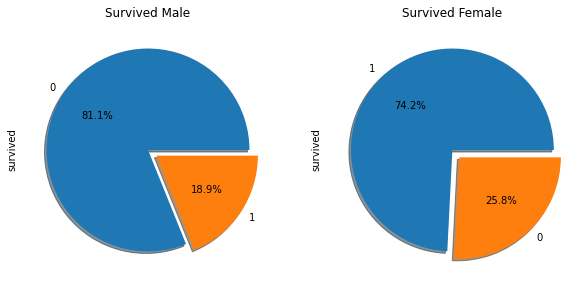

In [52]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# 전체 남자들(577명) 중 생존자(109명) 비율
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

# 전체 여자들(314명) 중 생존자(233명) 비율
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Survived Male')
ax[1].set_title('Survived Female')
plt.show()


In [53]:
titanic['survived'][titanic['sex'] == 'male'].value_counts()


0    468
1    109
Name: survived, dtype: int64

In [54]:
titanic['survived'][titanic['sex'] == 'female'].value_counts()


1    233
0     81
Name: survived, dtype: int64

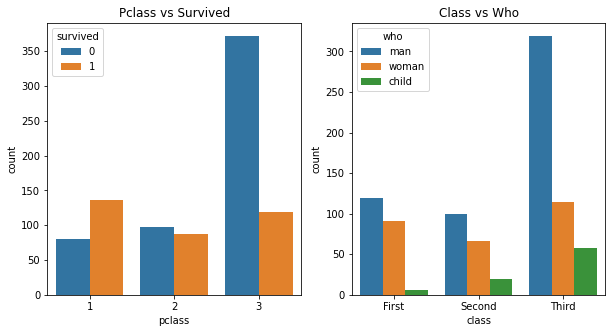

In [55]:
# 등급별 생존자수
fig = plt.figure(figsize=(10, 5))
area01 = fig.add_subplot(1, 2, 1)

# countplot : 항목별 갯수 세어줌
sns.countplot(x='pclass', hue='survived', data=titanic, ax=area01)
area01.set_title('Pclass vs Survived')

area02 = fig.add_subplot(1, 2, 2)
sns.countplot(x='class', hue='who', data=titanic, ax=area02)
area02.set_title('Class vs Who')

plt.show()


In [56]:
# 편차 = 관측값 - 평균값
# 상관계수 : 피어슨 상관계수 사용
# 결정계수 : 상관계수를 제곱한 수
titanic_corr = titanic.corr(method='pearson')
titanic_corr


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [57]:
titanic_corr.to_csv('titanic_corr.csv', index='False')


In [58]:
titanic['survived'].corr(titanic['fare'])


0.25730652238496227

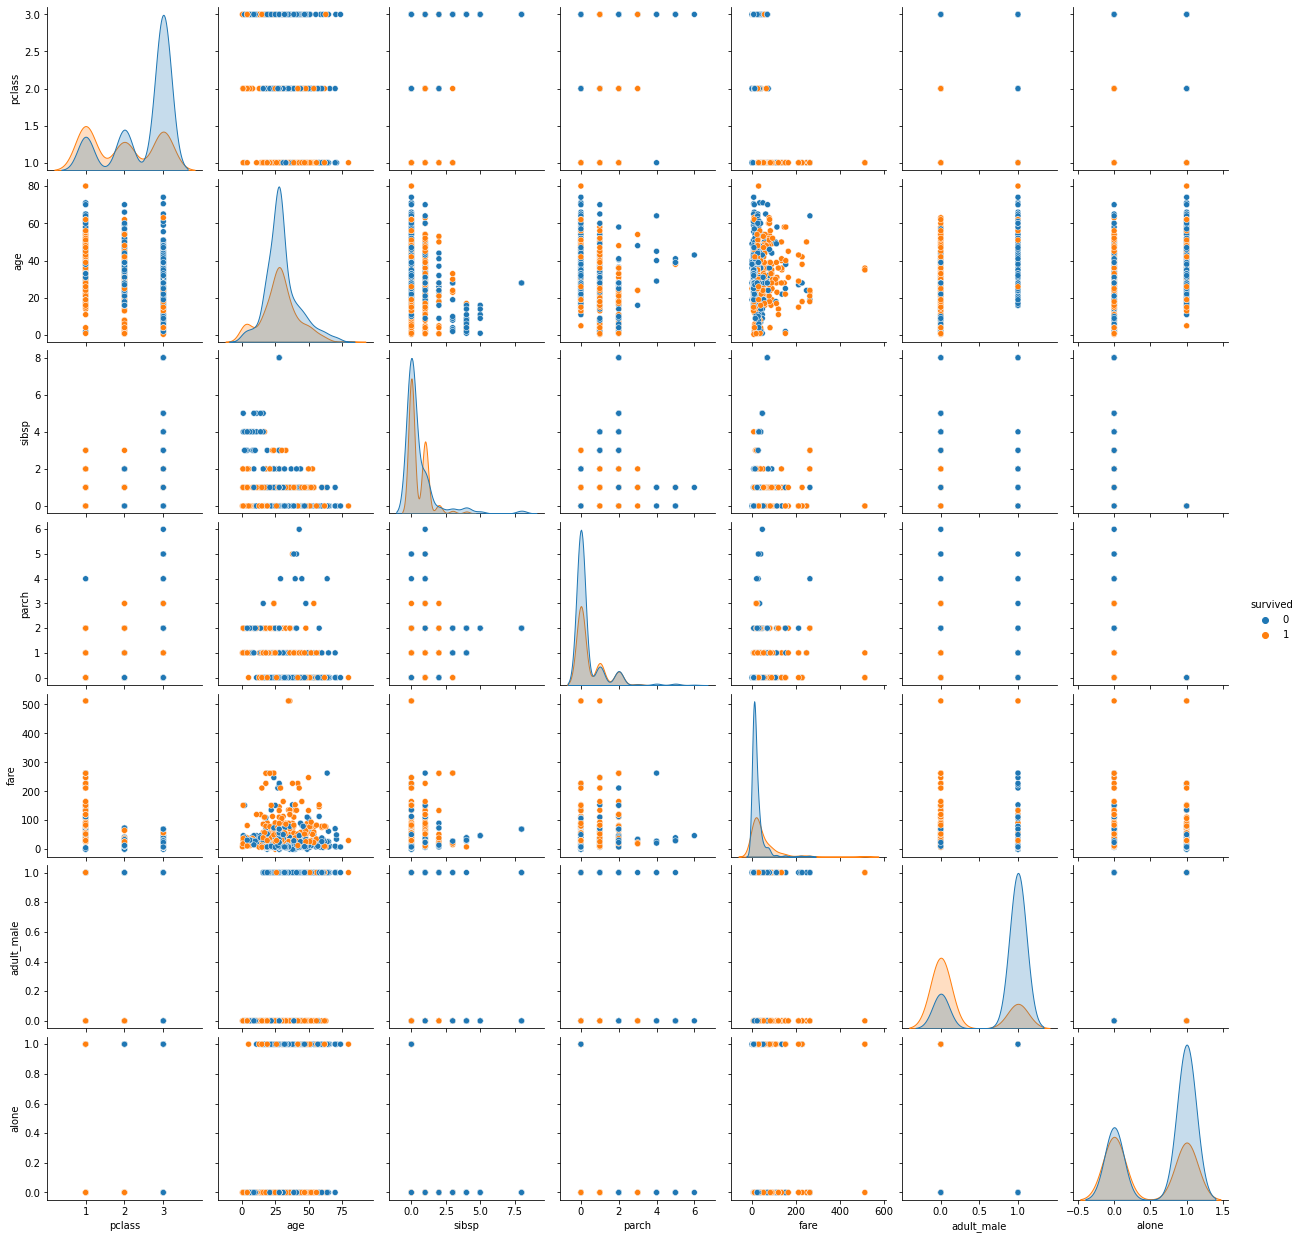

In [59]:
# pairplot : 그리드 형태로 데이터 프레임에 있는 각 데이터 열의 조합을 산점도로 표현
sns.pairplot(titanic, hue='survived')
plt.show()


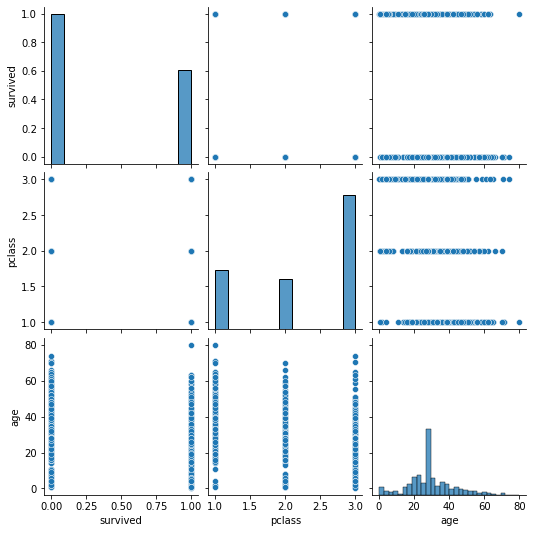

In [62]:
sns.pairplot(data=titanic,
             x_vars=['survived', 'pclass', 'age'],
             y_vars=['survived', 'pclass', 'age'])


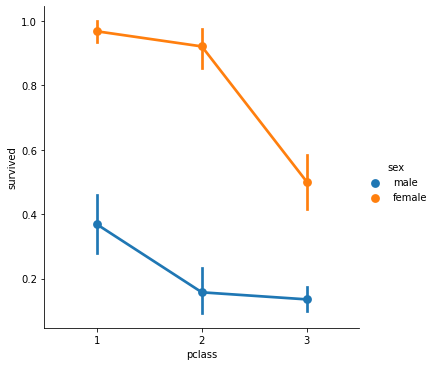

In [64]:
# 객실등급과 생존의 상관관계 : catplot
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')
plt.show()


In [67]:
# 히트맵 : 카테고리 형식
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7


In [73]:
titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex2'] = titanic['sex'].map({'male': 1, 'female': 0})
titanic['family'] = titanic['sibsp']+titanic['parch']+1


In [74]:
titanic.to_csv('titanic_ver2.csv', index=False)


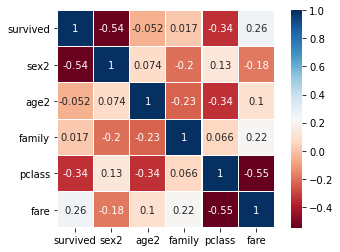

In [75]:
heatmap_data = titanic[['survived', 'sex2',
                        'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=-.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 10})
plt.show()


In [ ]:
# 상관분석 : 두 변수가 어떤 선형적인 관계에 있는지를 분석
# 상관계수 : -1 ~ 1
# 0.0 ~ 0.2 : 상관관계가 거의 없다.
# 0.2 ~ 0.4 : 약한 상관관계
# 0.4 ~ 0.6 : 상관관계가 있다.
# 0.6 ~ 0.8 : 강한 상관관계가 있다.
# 0.8 ~ 1.0 : 매우 강한 상관관계가 있다.
